In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
list_df = []
for i in range(10):
    df_tmp = pd.read_csv("schematic/data/ladder3_VgtVbonmcwilson-"+str(i+1)+".txt", delimiter="\s+")
    df_tmp["bit"] = df_tmp.index
    df_tmp["v(b0)"] = (df_tmp["v(b0)"] > 1e-3).astype(float)
    df_tmp["v(b1)"] = (df_tmp["v(b1)"] > 1e-3).astype(float)
    df_tmp["v(b2)"] = (df_tmp["v(b2)"] > 1e-3).astype(float)
    df_tmp["src"] = np.ones(len(df_tmp.iloc[:, [1]]))*i
    df_tmp["lsb"] = df_tmp["i(vbias)"]/12
# my_df = pd.read_csv("sample_data/mcdactut1.txt", delimiter="\s+")
    df_tmp["dnl"] = np.array([df_tmp.lsb.iloc[0]]+list(df_tmp["i(viout)"].iloc[1:].values - df_tmp["i(viout)"].iloc[0:-1].values))-df_tmp["lsb"]
    df_tmp["inl"] = df_tmp["dnl"].cumsum()
    list_df.append(df_tmp)

In [22]:
my_df = pd.concat(list_df).reset_index(drop=True)

my_df.head()

,b0,v(b0),v(b1),v(b2),i(vbias),i(viout),v(vbout),bit,src,lsb,dnl,inl
0,3.349635e-09,0.0,0.0,0.0,7.235897e-07,2.159428e-11,0.163487,0,0.0,6.029914e-08,0.000000e+00,0.000000e+00
1,5.847921e-01,1.0,0.0,0.0,7.235905e-07,1.843722e-07,0.495587,1,0.0,6.029920e-08,1.240514e-07,1.240514e-07
2,3.349635e-09,0.0,1.0,0.0,7.235904e-07,3.494562e-07,0.522212,2,0.0,6.029920e-08,1.047848e-07,2.288362e-07
3,5.847922e-01,1.0,1.0,0.0,7.235911e-07,5.157726e-07,0.538866,3,0.0,6.029926e-08,1.060172e-07,3.348534e-07
4,3.349635e-09,0.0,0.0,1.0,7.235904e-07,6.597060e-07,0.549594,4,0.0,6.029920e-08,8.363419e-08,4.184876e-07


Text(0, 0.5, 'DNL (LSB)')

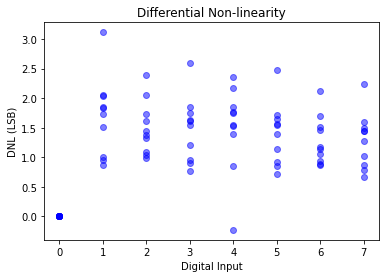

In [23]:
fig, ax = plt.subplots()
ax.plot(my_df.bit, my_df.dnl/my_df.lsb, "bo", alpha=0.5)
# ax.
# ax.plot(my_df["i(Vbias)"]/8)
ax.set_title("Differential Non-linearity")
ax.set_xlabel("Digital Input")
ax.set_ylabel("DNL (LSB)")

Text(0, 0.5, 'INL ($LSB$)')

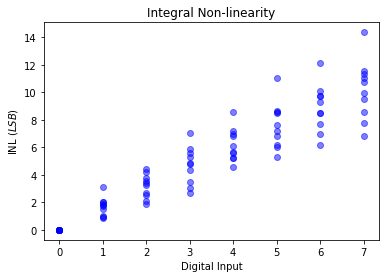

In [24]:
fig, ax = plt.subplots()
ax.plot(my_df.bit, my_df.inl/my_df.lsb, "bo", alpha=0.5)
ax.set_title("Integral Non-linearity")
ax.set_xlabel("Digital Input")
ax.set_ylabel("INL ($LSB$)")